In [1]:
import numpy as np
from skimage import io as skio

from matplotlib import pyplot as plt

In [41]:
img1 = skio.imread('1016-cat.jpg', as_grey=True)
img1 = (img1 * 256).astype(int)
img1[img1 == 256] = 255

with open('Pelvis_380_300_31_16bit_roi.raw', 'rb') as fin:
    img2 = np.fromfile(fin, dtype=np.int16)
img2 = img2.reshape(380, 300, 31)

In [28]:
def matrix(img, bins=16, bits=8):
    in_bin = (2 ** bits) // bins
    result = np.zeros((bins, bins))
    img = img.copy()
    img //= in_bin
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if i + 1 < img.shape[0]:
                result[img[i, j], img[i + 1, j]] += 1
            if j + 1 < img.shape[1]:
                if i + 1 < img.shape[0]:
                    result[img[i, j], img[i + 1, j + 1]] += 1
                result[img[i, j], img[i, j + 1]] += 1
                if i > 0:
                    result[img[i, j], img[i - 1, j + 1]] += 1
    return result

In [29]:
matrix1 = matrix(img1)

In [30]:
matrix2 = matrix(img1, bins=256, bits=8)

In [39]:
def matrix3d(img, bins=16, bits=12):
    in_bin = (2 ** bits) // bins
    result = np.zeros((bins, bins))
    img = img.copy()
    img //= in_bin
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            for k in range(img.shape[2]):
                if i + 1 < img.shape[0]:
                    result[img[i, j, k], img[i + 1, j, k]] += 1
                    if k > 0:
                        result[img[i, j, k], img[i + 1, j, k - 1]] += 1
                    if k + 1 < img.shape[2]:
                        result[img[i, j, k], img[i + 1, j, k + 1]] += 1
                    if j > 0:
                        result[img[i, j, k], img[i + 1, j - 1, k]] += 1
                        if k > 0:
                            result[img[i, j, k], img[i + 1, j - 1, k - 1]] += 1
                        if k + 1 < img.shape[2]:
                            result[img[i, j, k], img[i + 1, j - 1, k + 1]] += 1
                    if j + 1 < img.shape[1]:
                        result[img[i, j, k], img[i + 1, j + 1, k]] += 1
                        if k > 0:
                            result[img[i, j, k], img[i + 1, j + 1, k - 1]] += 1
                        if k + 1 < img.shape[2]:
                            result[img[i, j, k], img[i + 1, j + 1, k + 1]] += 1
                if j + 1 < img.shape[1]:
                    result[img[i, j, k], img[i, j + 1, k]] += 1
                    if k > 0:
                        result[img[i, j, k], img[i, j + 1, k - 1]] += 1
                    if k + 1 < img.shape[2]:
                        result[img[i, j, k], img[i, j + 1, k + 1]] += 1
                if k + 1 < img.shape[2]:
                    result[img[i, j, k], img[i, j, k + 1]] += 2
    return result

In [42]:
matrix3 = matrix3d(img2)

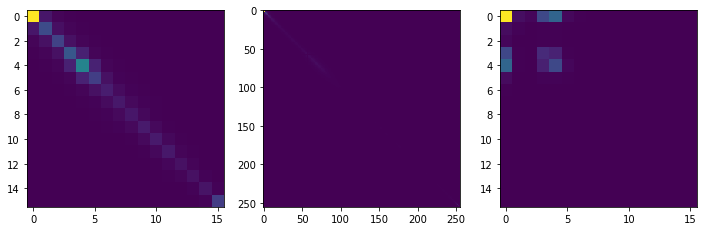

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
axes[0].imshow(matrix1)
axes[1].imshow(matrix2)
axes[2].imshow(matrix3)